In [109]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

### aim of this project is to understand, (on a black friday sale day):
### 1. purchasing behaviour of male vs. female ("gender")
### 2. how it varies wrt "age", "marital status"
### 3. Statistical methods to conclude above consists of following analysis:
###    a. calculate average
###    b. check the confidence interval for 90/95/99
###    c. check if these are overlapping intervals
###    d. since sample data of ~550K is available and population of 50M is present, 
###       we have to use central limit theorem to check how sample mean comapares with population means

In [110]:
df = pd.read_csv("retail_data.txt")

In [111]:
df.shape

(550068, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### user_id : invidual customers
### user_attributes as in: gender/age/occupation/city/stay_in_city_years/marital-status is present
### product_attributes as in: product_id and product_category are present
### purchase amount for each user and product 

In [113]:
df.isnull().sum()/ len(df)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

### there are no null values in the data


In [114]:
len(df.drop_duplicates()) == df.shape[0]

True

### there are no duplicate records

# Analysis of data is divided into 3 sections:
# section 1: Analysis of User attributes & Analysis of Product attributes
# section 2: Generating statiscal summary (bootstrap+CLT+descriptive analysis)

# section 1: Analysis of User attributes & Analysis of Product attributes

In [115]:
userCol = ['User_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']

In [116]:
dfU = df[userCol]
dfU.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000001,F,0-17,10,A,2,0
2,1000001,F,0-17,10,A,2,0
3,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0


In [117]:
dfU['User_ID'].nunique()

5891

In [118]:
dfU.shape

(550068, 7)

In [119]:
dfU.drop_duplicates(inplace=True)

Number of unique values in column 'Gender': 2
M    71.719572
F    28.280428
Name: Gender, dtype: float64


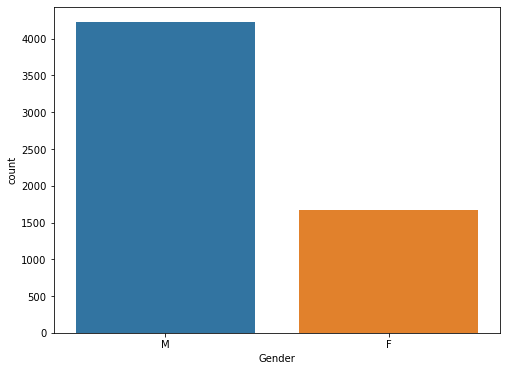

################################
Number of unique values in column 'Age': 7
26-35    34.849771
36-45    19.809879
18-25    18.146325
46-50     9.013750
51-55     8.164997
Name: Age, dtype: float64


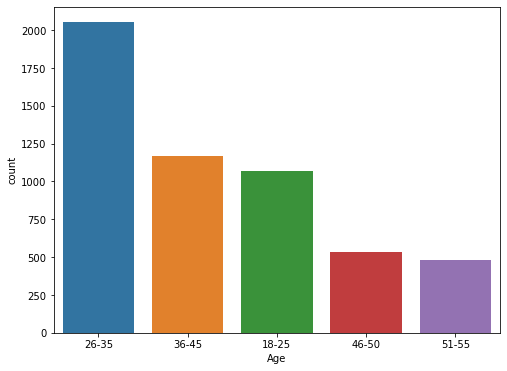

################################
Number of unique values in column 'Occupation': 21
4     12.561535
0     11.678832
7     11.356306
1      8.776099
17     8.334748
Name: Occupation, dtype: float64


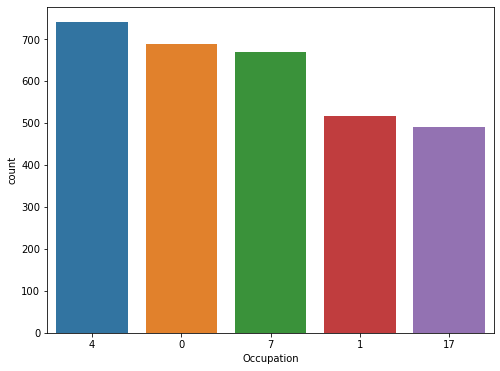

################################
Number of unique values in column 'City_Category': 3
C    53.284672
B    28.976405
A    17.738924
Name: City_Category, dtype: float64


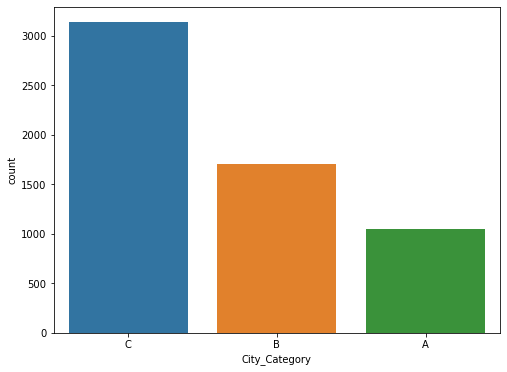

################################
Number of unique values in column 'Stay_In_Current_City_Years': 5
1     35.409947
2     19.436428
3     16.618571
4+    15.430317
0     13.104736
Name: Stay_In_Current_City_Years, dtype: float64


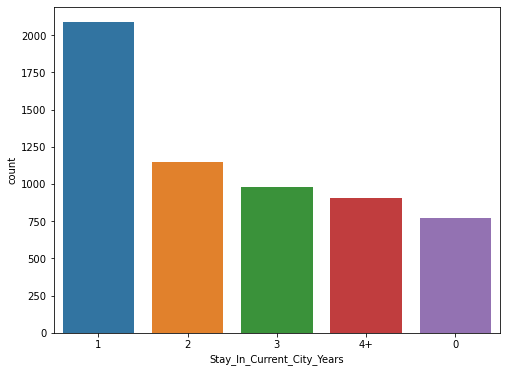

################################
Number of unique values in column 'Marital_Status': 2
0    58.003735
1    41.996265
Name: Marital_Status, dtype: float64


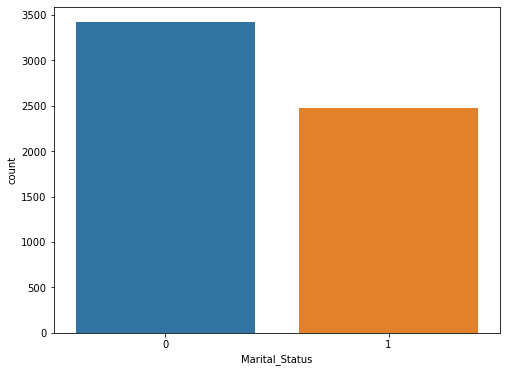

################################


In [120]:
colsList = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']

for col in colsList:
    print(f"Number of unique values in column '{col}':", dfU[col].nunique())
    print(((dfU[col].value_counts()/len(dfU))*100).head(5))
    plt.figure(figsize = (8,6))
    sns.countplot(x = col ,data =dfU, order = dfU[col].value_counts().nlargest(n=5).index)

    plt.show()
    print("################################")

### Observations on attributes of users who visited on Black Friday sale day:

### - number of unique customers are: 5891
### - gender: male footprints/visits are more on the sale day, 71% of them were males
### - age: appears in bins with most frequent bin is 26-35 which appears 35% of time
### - Occupation: there are 21 unique occupations with occupation #4 appears 12% of time followed by occupation #0 and #7
### - City_Category: most of people who shopped belong to city category C (53%)
### - Stay_In_Current_City_Years: number of years people have been living in current city varies from 0-3 and then 4+ years where most people who have shopped lived belongs to 1 year category (35%)
### - Marital_Status - alomost 58% of people who have shopped belong on 0 marital status category




# lets analyse product attributes

In [121]:
print(df['Product_ID'].nunique())

3631


In [122]:
print(df['Product_Category'].nunique())

20


In [123]:
print(df['Product_Category'].value_counts(normalize=True).nlargest(10) *100)
print(df['Product_ID'].value_counts(normalize=True).nlargest(10) *100)

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
Name: Product_Category, dtype: float64
P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
P00184942    0.261786
P00046742    0.261422
P00058042    0.258513
P00145042    0.255605
P00059442    0.255605
Name: Product_ID, dtype: float64


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

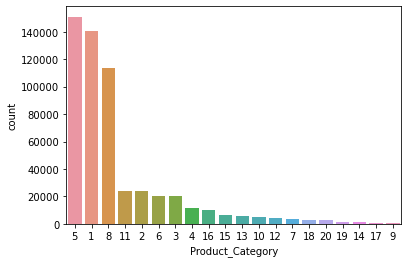

In [124]:
sns.countplot(x = 'Product_Category' ,data =df, order = df['Product_Category'].value_counts().index)

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

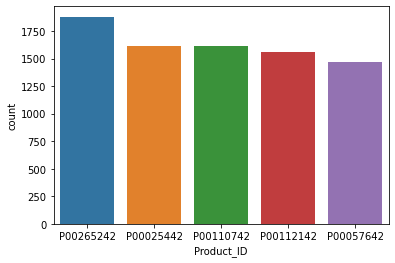

In [125]:
sns.countplot(x = 'Product_ID' ,data =df, order = df['Product_ID'].value_counts().nlargest(n=5).index)

### Observation on attributes of products

### number of unique product_category are 20, where as each each product is mapped to multiple product_ids
### product_category: 5 appears 27%% of time in data 
### product_id: P00265242 appears 0.34% of time in data 

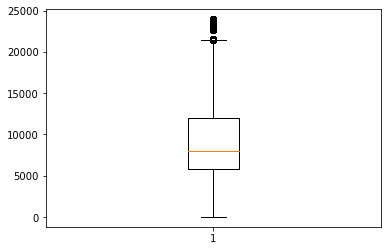

In [126]:
# lets analyse column Purchase
plt.boxplot(x = df['Purchase'])
plt.show()

In [127]:
len(df[df['Purchase']> 20000])/df.shape[0]

0.023071692954325648

### assuming currency is in dollars
### the median value of purchase is 10000, whereas there are very high volume of purchases > 20,000, which is around 2% of data


# Outlier Treatment:
### There are around 2% of purchases which seems to be outlier. But I don't have additional information (like user demographic) to validate them. 
### for now, I am keeping it as actual data, not removing them as outliers. But keeping in mind ~2% of purchase > $20k


# lets try to buid on customer profile and effect on purchase: Gender,Age,Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status


In [128]:
# Gender
df.groupby(['Gender']).agg({'Purchase':np.mean})

,Purchase
Gender,
F,8734.565765
M,9437.526040


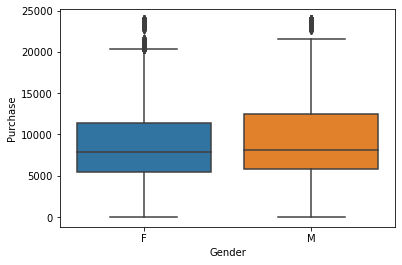

In [129]:
sns.boxplot(x = df['Gender'], y = df['Purchase'])
plt.show()

In [130]:
len(df[(df['Purchase']> 20000) & (df['Gender'] == 'M')])

9869

In [131]:
len(df[(df['Purchase']> 20000) & (df['Gender'] == 'F')])

2822

### based on sample data, the median value of purchase amount doesn't vary much by gender. Also, mean purchase amount for males is 
### around 10% higher than of females. This can be due to very high purchase volume seem in males than females(~9.8k vs ~2.8k)


# Age

In [132]:
df.groupby(['Age']).agg({'Purchase':np.mean}).sort_values(by='Purchase')

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
46-50,9208.625697
26-35,9252.690633
36-45,9331.350695
55+,9336.280459
51-55,9534.808031


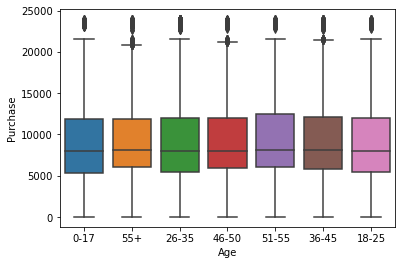

In [133]:
sns.boxplot(x = df['Age'], y = df['Purchase'])
plt.show()

### almost all age bins have similar "Purchase" medians, but age bin- 55+ spends more 

# Occupation

In [134]:
df.groupby(['Occupation']).agg({'Purchase':np.mean}).sort_values(by='Purchase')

,Purchase
Occupation,
9,8637.743761
19,8710.627231
20,8836.494905
2,8952.481683
1,8953.193270
10,8959.355375
0,9124.428588
18,9169.655844
3,9178.593088


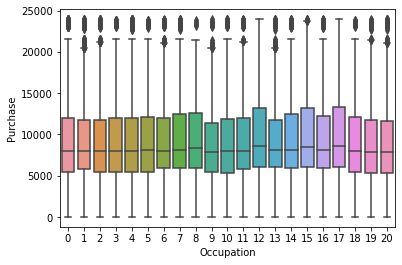

In [135]:
sns.boxplot(x = df['Occupation'], y = df['Purchase'])
plt.show()

### almost all categories of accupation have similar "Purchase" behaviour

# City_Category

In [136]:
df.groupby(['City_Category']).agg({'Purchase':np.mean})

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


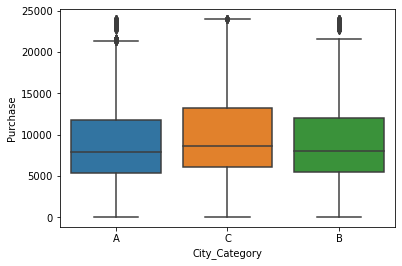

In [137]:
sns.boxplot(x = df['City_Category'], y = df['Purchase'])
plt.show()

### people in city category C have slightly more median Purchase value than that of A and B. Also, mean purchase value of people in city category C is more. This means tha, people in city category C spend more on purchase amount


# Stay_In_Current_City_Years

In [138]:
df.groupby(['Stay_In_Current_City_Years']).agg({'Purchase':np.mean}).sort_values(by='Purchase')

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
4+,9275.598872
3,9286.904119
2,9320.429810


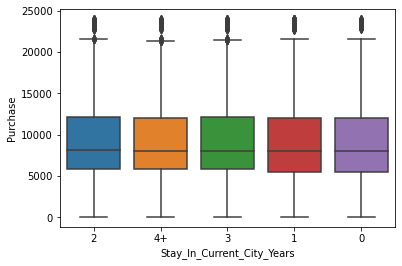

In [139]:
sns.boxplot(x = df['Stay_In_Current_City_Years'], y = df['Purchase'])
plt.show()

### Stay_In_Current_City_Years feature doesn't seem to have much effect on Purchase behaviour

# Marital_Status

In [140]:
df.groupby(['Marital_Status']).agg({'Purchase':np.mean}).sort_values(by='Purchase')

,Purchase
Marital_Status,
1,9261.174574
0,9265.907619


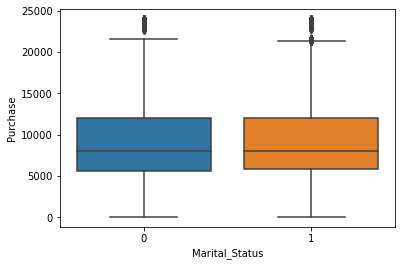

In [141]:
sns.boxplot(x = df['Marital_Status'], y = df['Purchase'])
plt.show()

### Marital_Status feature doesn't seem to have much effect on Purchase behaviour though there are more outliers in Purchase amount in marital status category 1


# lets see Gender profiling of people visiting the store

In [142]:
pd.crosstab(dfU['Gender'],dfU['Age'],normalize=True)*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,1.324054,4.871838,9.25140,5.652691,3.089458,2.410457,1.680530
M,2.376507,13.274487,25.59837,14.157189,5.924291,5.754541,4.634188


In [143]:
pd.crosstab(dfU['Gender'],dfU['City_Category'],normalize=True)*100

City_Category,A,B,C
Gender,,,
F,5.007639,8.538448,14.734341
M,12.731285,20.437956,38.550331


In [144]:
pd.crosstab(dfU['Gender'],dfU['Stay_In_Current_City_Years'],normalize=True)*100

Stay_In_Current_City_Years,0,1,2,3,4+
Gender,,,,,
F,3.632660,10.252928,5.567815,4.854863,3.972161
M,9.472076,25.157019,13.868613,11.763707,11.458157


In [145]:
pd.crosstab(dfU['Gender'],dfU['Marital_Status'],normalize=True)*100

Marital_Status,0,1
Gender,,
F,16.075369,12.205059
M,41.928365,29.791207


# Males- 41% belong to 0-marital status; 25% staying in current city for 1 year; 38% belong to city category C;25% in age category 26-35years
# Female- 16% belong to 0-marital status; 10% staying in current city for 1 year; 14% belong to city category C;9% in age category 26-35years


# which product_id/product_category, which gender is more inclined

In [146]:
pd.crosstab(df['Product_Category'],df['Gender'],normalize=True)*100

Gender,F,M
Product_Category,,
1,4.514169,21.005948
2,1.028600,3.309773
3,1.091865,2.582772
4,0.661555,1.475090
5,7.628330,19.810642
6,0.828807,2.891824
7,0.171433,0.505028
8,6.100700,14.610375
9,0.012726,0.061811


### male and females are both inclined to product_categories - 1,5,8

In [147]:
pd.crosstab(df['Product_Category'],df['City_Category'],normalize=True)*100

City_Category,A,B,C
Product_Category,,,
1,6.377575,10.590145,8.552397
2,1.116407,1.898674,1.323291
3,0.898616,1.561080,1.214941
4,0.554477,0.950064,0.632104
5,7.673779,11.660013,8.105180
6,1.001149,1.549990,1.169492
7,0.222882,0.290691,0.162889
8,5.850004,8.644931,6.216141
9,0.019998,0.031632,0.022906


### again, irrespective of people living in cities A,B and C- product categories 1,5,8 are more purchased items


In [148]:
pd.crosstab(df['Product_Category'],df['Stay_In_Current_City_Years'],normalize=True)*100

Stay_In_Current_City_Years,0,1,2,3,4+
Product_Category,,,,,
1,3.373219,8.875085,4.819950,4.541439,3.910426
2,0.581746,1.523266,0.838078,0.768996,0.626286
3,0.507028,1.274024,0.711185,0.651738,0.530662
4,0.288510,0.745181,0.387952,0.382135,0.332868
5,3.744992,9.653716,5.109550,4.794316,4.136398
6,0.497575,1.320928,0.678643,0.625559,0.597926
7,0.101442,0.234698,0.109259,0.125439,0.105623
8,2.788928,7.481620,3.679181,3.467571,3.293775
9,0.011271,0.023997,0.015816,0.013998,0.009453


###  again, irrespective of number of years of staying- product categories 1,5,8 are more purchased items

In [149]:
pd.crosstab(df['Product_Category'],df['Marital_Status'],normalize=True)*100

Marital_Status,0,1
Product_Category,,
1,15.339013,10.181105
2,2.570228,1.768145
3,2.246813,1.427823
4,1.304748,0.831897
5,16.299076,11.139895
6,2.206818,1.513813
7,0.370863,0.305599
8,11.891439,8.819637
9,0.044904,0.029633


### same behaviour wrt marital status. product_category 1,5,8 are more frequent

In [150]:
a = pd.crosstab(df[df['Product_Category'] == 1]['Product_ID'],df['Gender'],normalize=True)*100
a.sort_values(by = 'F',ascending=False)

Gender,F,M
Product_ID,,
P00110742,0.260012,0.888316
P00110842,0.254313,0.658223
P00025442,0.247902,0.902563
P00112142,0.241491,0.871219
P00110942,0.220832,0.747980
...,...,...
P00105842,0.000000,0.001425
P00201642,0.000000,0.010685
P00128542,0.000000,0.004274


In [151]:
a = pd.crosstab(df[df['Product_Category'] == 5]['Product_ID'],df['Gender'],normalize=True)*100
a.sort_values(by = 'F',ascending=False)

Gender,F,M
Product_ID,,
P00265242,0.336573,0.909013
P00220442,0.291520,0.557863
P00034742,0.241167,0.561839
P00117442,0.236529,0.598279
P00117942,0.223278,0.680434
...,...,...
P00301142,0.000000,0.001325
P00056342,0.000000,0.000663
P00301042,0.000000,0.001988


In [152]:
a = pd.crosstab(df[df['Product_Category'] == 8]['Product_ID'],df['Gender'],normalize=True)*100
a.sort_values(by = 'F',ascending=False)

Gender,F,M
Product_ID,,
P00058042,0.339697,0.908492
P00031042,0.297564,0.755760
P00051442,0.287909,0.808427
P00157542,0.238754,0.496818
P00085242,0.227343,0.562651
...,...,...
P00126342,0.000000,0.000878
P00127142,0.000000,0.002633
P00247242,0.000000,0.004389


### for product_actegory 1: these are Top5 product_ids with more purchase volumne -> P00110742, P00110842, P00025442, P00112142,P00110942
### for product_category 5: top5 productIDs -> P00265242, P00220442, P00034742, P00117442,P00117942
### for product_category 8: top5 productIDs -> P00058042, P00031042, P00051442, P00157542,P00085242


In [153]:
df.groupby(['Product_Category'])['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

### we can see that number of items belonging to product_categories 1,5,8 are maximum

# section 2: Generating statistical summary (bootstrap+CLT+descriptive analysis)

# Lets generate statistical summaries
### lets see the mean values for the population
### using CLT, we can verify the population mean and build CI around the "Purchase" value

# analysis of Gender -sample statistics,  generate bootstrap samples and build confidence interval

In [154]:
MeanPurchaseByEachUser = df.groupby('User_ID')['Purchase'].mean()

In [155]:
dfPurchase = pd.merge(dfU,MeanPurchaseByEachUser, on = 'User_ID', how='inner')

------Gender : F------
	


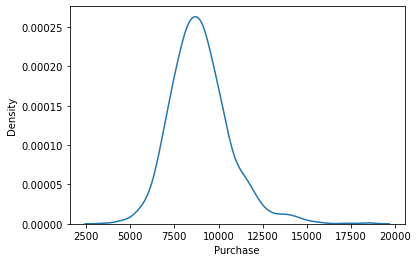

	
------Sample statistics-------
	
count     1666.000000
mean      8965.198464
std       1705.615508
min       3599.733333
25%       7857.252965
50%       8818.059311
75%       9859.887613
max      18490.166667
Name: Purchase, dtype: float64
	
90% CI:  8896.48 , 9033.92
95% CI:  8883.32 , 9047.08
99% CI:  8857.59 , 9072.81
	
----Confidence Interval calculations for population----
	
population mean:  8965.188173384295
population SD:  0.017034110592939196
	


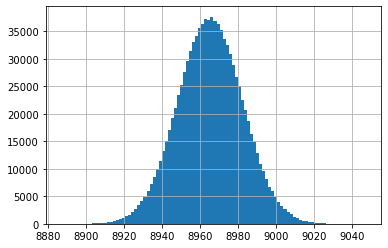

	
90.0 % CI: (8965.160154765705, 8965.216192002885)
95.0 % CI: (8965.154787141024, 8965.221559627566)
99.0 % CI: (8965.14429642307, 8965.23205034552)


-----------------------------------
	
------Gender : M------
	


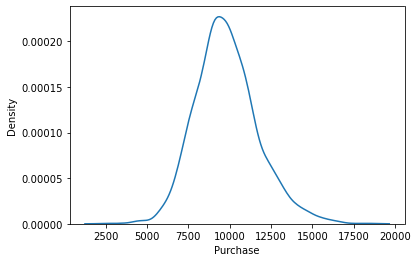

	
------Sample statistics-------
	
count     4225.000000
mean      9806.867524
std       1906.396106
min       2318.733333
25%       8552.733333
50%       9681.895604
75%      10933.852459
max      18577.893617
Name: Purchase, dtype: float64
	
90% CI:  9758.63 , 9855.11
95% CI:  9749.39 , 9864.35
99% CI:  9731.32 , 9882.41
	
----Confidence Interval calculations for population----
	
population mean:  9806.864022844393
population SD:  0.01904318226367207
	


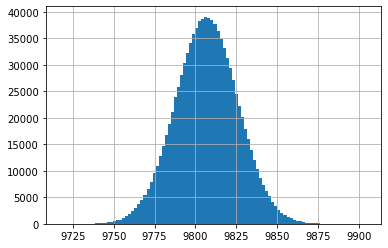

	
90.0 % CI: (9806.832699596978, 9806.895346091807)
95.0 % CI: (9806.826698893005, 9806.901346795781)
99.0 % CI: (9806.814970857486, 9806.9130748313)


-----------------------------------
	


In [161]:
UniqueGender = dfPurchase['Gender'].unique()
r = 1000000
size = 10000
alpha = [0.90,0.95,0.99]
    
for g in UniqueGender:
    print(f'------Gender : {g}------')
    print("\t")
    data = dfPurchase[dfPurchase['Gender'] == g]['Purchase']
    sns.kdeplot(data)
    plt.show()
    print("\t")
    print('------Sample statistics-------')
    print("\t")
    print(data.describe())
    print("\t")
    
    print('90% CI: ',round(np.mean(data) - 1.645* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 1.645* np.std(data)/math.sqrt(len(data)),2))
    print('95% CI: ',round(np.mean(data) - 1.96* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 1.96* np.std(data)/math.sqrt(len(data)),2))
    print('99% CI: ',round(np.mean(data) - 2.576* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 2.576* np.std(data)/math.sqrt(len(data)),2))
    print("\t")
    
    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(data, size=size)
        bs_means[i] = np.mean(bs_sample)
        
    print("----Confidence Interval calculations for population----")
    print("\t")
    print("population mean: ",np.mean(bs_means))
    print("population SD: ", stats.sem(bs_means))
    print("\t")
    
    plt.figure()
    plt.hist(bs_means, bins=100)
    plt.grid()
    plt.show()
    
    print("\t")
        
    for a in alpha:
        print(a*100,'%','CI:' ,stats.norm.interval(alpha= a, 
                 loc=np.mean(bs_means),
                 scale=stats.sem(bs_means)))
        
    print("\n")
    print("-----------------------------------")
    print("\t")
    
    
    

### Female -> sample mean: 8965.19, sample std-dev: 1705.61, 95% CI:[8883.32 , 9047.08]
###          population mean: 8965.34, population SD: 0.17, 95% CI:[8964.86, 8965.53]

### Male -> sample mean: 9806.86, sample std-dev: 1906.39, 95% CI:[9749.39 , 9864.35]
###          population mean: 9806.89, population SD: 0.019, 95% CI:[9806.86, 9806.93]

### Conclusion: 

### 1. The distribution of CI for Females is different than Males. So, we can have different targeted marketing strategies for males and females.
###             2. Sample CI contains population mean for both Males and Females. This we see from CLT experiment as well.
###             3. The original distribution seems to be right skewed, but with sufficent large number of samples, we can see Gaussian distribution(CLT). 


# analysis of Marital status -sample statistics,  generate bootstrap samples and build confidence interval

------ Marital status : 0------
	


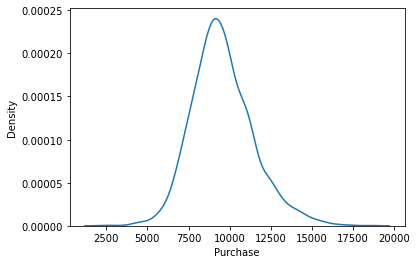

	
------Sample statistics-------
	
count     3417.000000
mean      9564.407142
std       1877.332265
min       2318.733333
25%       8331.857143
50%       9376.844828
75%      10657.730909
max      18577.893617
Name: Purchase, dtype: float64
	
90% CI:  9511.58 , 9617.23
95% CI:  9501.47 , 9627.34
99% CI:  9481.69 , 9647.13
	
----Confidence Interval calculations for population----
	
population mean:  9564.436525837536
population SD:  0.018772153587670346
	


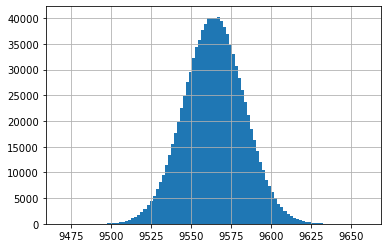

	
90.0 % CI: (9564.405648392622, 9564.467403282451)
95.0 % CI: (9564.399733092592, 9564.47331858248)
99.0 % CI: (9564.388171974235, 9564.484879700838)


-----------------------------------
	
------ Marital status : 1------
	


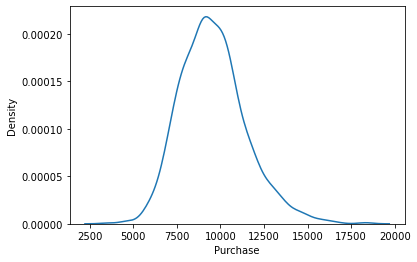

	
------Sample statistics-------
	
count     2474.000000
mean      9574.962299
std       1907.927002
min       3421.521739
25%       8230.633143
50%       9408.700535
75%      10642.843137
max      18490.166667
Name: Purchase, dtype: float64
	
90% CI:  9511.88 , 9638.05
95% CI:  9499.79 , 9650.13
99% CI:  9476.17 , 9673.75
	
----Confidence Interval calculations for population----
	
population mean:  9574.905339766588
population SD:  0.019092633413470953
	


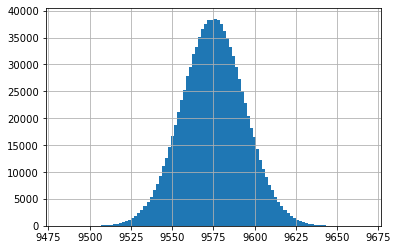

	
90.0 % CI: (9574.87393517927, 9574.936744353907)
95.0 % CI: (9574.867918892727, 9574.94276064045)
99.0 % CI: (9574.85616040196, 9574.954519131217)


-----------------------------------
	


In [162]:
UniqueMaritalStatus = dfPurchase['Marital_Status'].unique()
r = 1000000
size = 10000
alpha = [0.90,0.95,0.99]
    
for ms in UniqueMaritalStatus:
    print(f'------ Marital status : {ms}------')
    print("\t")
    data = dfPurchase[dfPurchase['Marital_Status'] == ms]['Purchase']
    sns.kdeplot(data)
    plt.show()
    print("\t")
    print('------Sample statistics-------')
    print("\t")
    print(data.describe())
    print("\t")
    
    print('90% CI: ',round(np.mean(data) - 1.645* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 1.645* np.std(data)/math.sqrt(len(data)),2))
    print('95% CI: ',round(np.mean(data) - 1.96* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 1.96* np.std(data)/math.sqrt(len(data)),2))
    print('99% CI: ',round(np.mean(data) - 2.576* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 2.576* np.std(data)/math.sqrt(len(data)),2))
    print("\t")
    
    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(data, size=size)
        bs_means[i] = np.mean(bs_sample)
        
    print("----Confidence Interval calculations for population----")
    print("\t")
    print("population mean: ",np.mean(bs_means))
    print("population SD: ", stats.sem(bs_means))
    print("\t")
    
    plt.figure()
    plt.hist(bs_means, bins=100)
    plt.grid()
    plt.show()
    
    print("\t")
        
    for a in alpha:
        print(a*100,'%','CI:' ,stats.norm.interval(alpha= a, 
                 loc=np.mean(bs_means),
                 scale=stats.sem(bs_means)))
        
    print("\n")
    print("-----------------------------------")
    print("\t")
    
    
    

### marital status 0 -> sample mean: 9564.40, sample std-dev: 1877.33, 95% CI:[9501.47 , 9627.34]
###          population mean: 9564.43, population SD: 0.018, 95% CI:[9564.39, 9564.47]

### marital status 1 -> sample mean: 9574.96, sample std-dev: 1907.92, 95% CI: [9499.79 , 9650.13]
###          population mean: 9574.9, population SD: 0.019, 95% CI:[9574.86, 9574.94]

### Conclusion: 
###             1. The CI for both 0,1 marital status overlaps.This is confirmed by population CI as well.
###             2.The CI of sample means for marital status for both 0 and 1 includes population mean shown by CLT
### experiment,
###             3. With present statistics, we don't see definitive distinction for both population. 
###                Hence, marketing team should not invest based on this distinction


# analysis of Age -sample statistics,  generate bootstrap samples and build confidence interval

------ Age bin: 0-17------
	


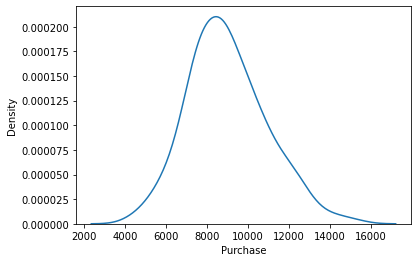

	
------Sample statistics-------
	
count      218.000000
mean      8986.318305
std       1931.550485
min       4322.193548
25%       7633.073206
50%       8785.443224
75%      10066.245402
max      15228.103448
Name: Purchase, dtype: float64
	
90% CI:  8771.61 , 9201.02
95% CI:  8730.5 , 9242.14
99% CI:  8650.1 , 9322.54
	
----Confidence Interval calculations for population----
	
population mean:  8986.327688623693
population SD:  0.01927147363215045
	


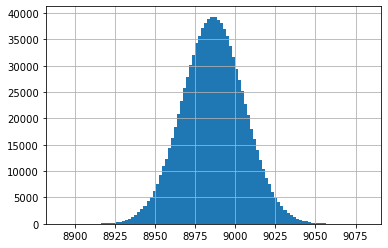

	
90.0 % CI: (8986.295989870392, 8986.359387376993)
95.0 % CI: (8986.289917229444, 8986.365460017942)
99.0 % CI: (8986.278048597189, 8986.377328650196)


-----------------------------------
	
------ Age bin: 55+------
	


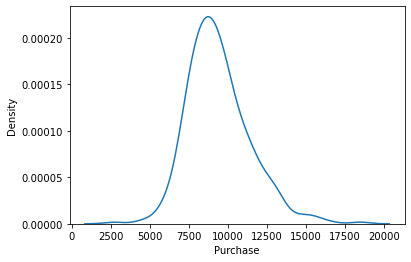

	
------Sample statistics-------
	
count      372.000000
mean      9407.200822
std       2004.010572
min       2698.357143
25%       8053.582935
50%       9101.580645
75%      10516.152597
max      18490.166667
Name: Purchase, dtype: float64
	
90% CI:  9236.51 , 9577.89
95% CI:  9203.82 , 9610.58
99% CI:  9139.91 , 9674.5
	
----Confidence Interval calculations for population----
	
population mean:  9407.19241104264
population SD:  0.020006103760229283
	


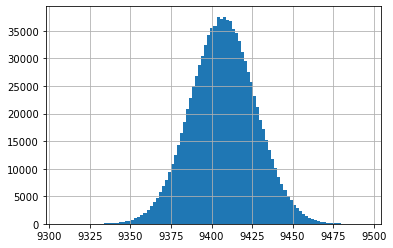

	
90.0 % CI: (9407.15950393031, 9407.225318154971)
95.0 % CI: (9407.153199799799, 9407.231622285482)
99.0 % CI: (9407.140878734326, 9407.243943350955)


-----------------------------------
	
------ Age bin: 26-35------
	


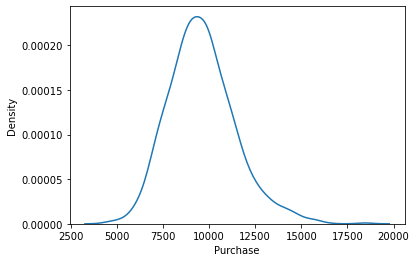

	
------Sample statistics-------
	
count     2053.000000
mean      9607.126898
std       1824.554390
min       4455.727273
25%       8367.211382
50%       9470.062500
75%      10654.493671
max      18577.893617
Name: Purchase, dtype: float64
	
90% CI:  9540.9 , 9673.35
95% CI:  9528.22 , 9686.03
99% CI:  9503.42 , 9710.83
	
----Confidence Interval calculations for population----
	
population mean:  9607.138472076891
population SD:  0.018256241816065936
	


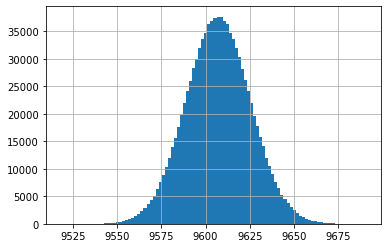

	
90.0 % CI: (9607.108443231326, 9607.168500922457)
95.0 % CI: (9607.102690500438, 9607.174253653344)
99.0 % CI: (9607.091447114248, 9607.185497039534)


-----------------------------------
	
------ Age bin: 46-50------
	


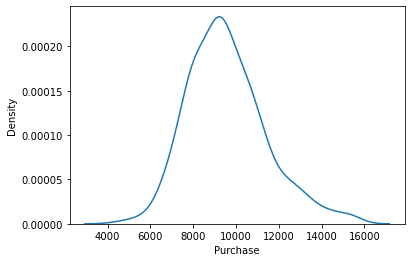

	
------Sample statistics-------
	
count      531.000000
mean      9565.974310
std       1839.800463
min       4512.470588
25%       8237.490260
50%       9327.807692
75%      10631.865591
max      15584.923077
Name: Purchase, dtype: float64
	
90% CI:  9434.76 , 9697.19
95% CI:  9409.63 , 9722.31
99% CI:  9360.5 , 9771.45
	
----Confidence Interval calculations for population----
	
population mean:  9565.963232987717
population SD:  0.018384059536504203
	


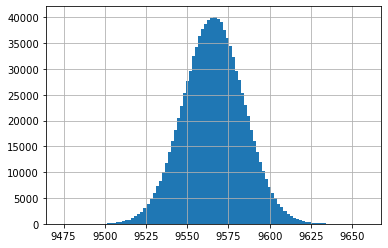

	
90.0 % CI: (9565.93299390071, 9565.993472074724)
95.0 % CI: (9565.927200893135, 9565.999265082299)
99.0 % CI: (9565.915878788444, 9566.01058718699)


-----------------------------------
	
------ Age bin: 51-55------
	


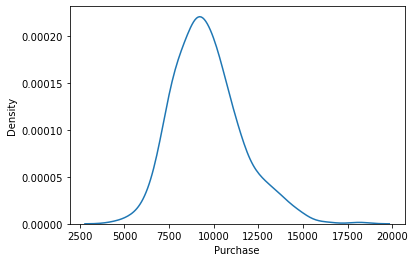

	
------Sample statistics-------
	
count      481.000000
mean      9630.474319
std       1922.486727
min       4462.014286
25%       8283.388889
50%       9406.671053
75%      10630.384615
max      18162.739130
Name: Purchase, dtype: float64
	
90% CI:  9486.43 , 9774.52
95% CI:  9458.84 , 9802.11
99% CI:  9404.9 , 9856.05
	
----Confidence Interval calculations for population----
	
population mean:  9630.470610567503
population SD:  0.019216548682681092
	


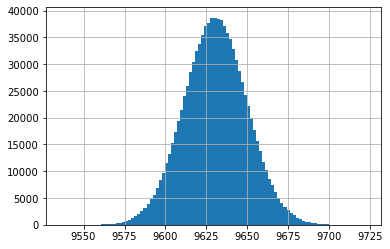

	
90.0 % CI: (9630.439002157706, 9630.5022189773)
95.0 % CI: (9630.432946824178, 9630.508274310829)
99.0 % CI: (9630.421112018294, 9630.520109116713)


-----------------------------------
	
------ Age bin: 36-45------
	


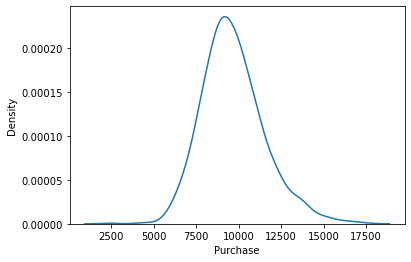

	
------Sample statistics-------
	
count     1167.000000
mean      9686.463039
std       1850.778593
min       2318.733333
25%       8459.250000
50%       9487.714286
75%      10741.987395
max      17508.700000
Name: Purchase, dtype: float64
	
90% CI:  9597.38 , 9775.55
95% CI:  9580.32 , 9792.61
99% CI:  9546.96 , 9825.96
	
----Confidence Interval calculations for population----
	
population mean:  9686.506124450963
population SD:  0.018515171578222484
	


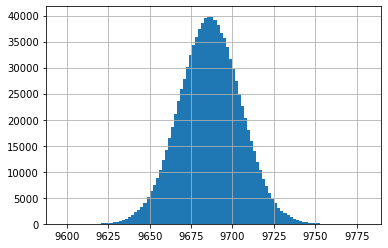

	
90.0 % CI: (9686.47566970384, 9686.536579198088)
95.0 % CI: (9686.469835381502, 9686.542413520425)
99.0 % CI: (9686.458432529453, 9686.553816372474)


-----------------------------------
	
------ Age bin: 18-25------
	


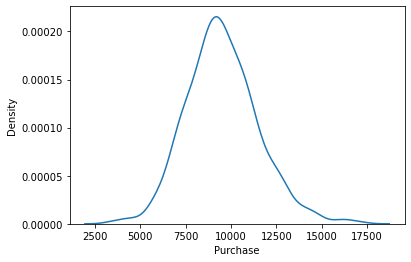

	
------Sample statistics-------
	
count     1069.000000
mean      9515.636521
std       1992.778282
min       3421.521739
25%       8197.800000
50%       9378.785714
75%      10676.418605
max      17246.439394
Name: Purchase, dtype: float64
	
90% CI:  9415.42 , 9615.85
95% CI:  9396.23 , 9635.04
99% CI:  9358.7 , 9672.57
	
----Confidence Interval calculations for population----
	
population mean:  9515.631488716279
population SD:  0.0199051477220269
	


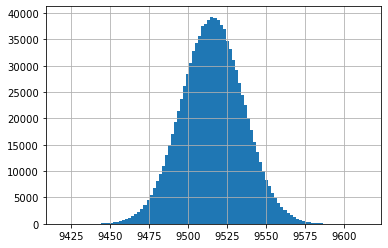

	
90.0 % CI: (9515.598747661854, 9515.664229770704)
95.0 % CI: (9515.592475343637, 9515.67050208892)
99.0 % CI: (9515.580216453485, 9515.682760979073)


-----------------------------------
	


In [163]:
age_bins = dfPurchase['Age'].unique()
r = 1000000
size = 10000
alpha = [0.90,0.95,0.99]
    
for ab in age_bins:
    print(f'------ Age bin: {ab}------')
    print("\t")
    data = dfPurchase[dfPurchase['Age'] == ab]['Purchase']
    sns.kdeplot(data)
    plt.show()
    print("\t")
    print('------Sample statistics-------')
    print("\t")
    print(data.describe())
    print("\t")
    
    print('90% CI: ',round(np.mean(data) - 1.645* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 1.645* np.std(data)/math.sqrt(len(data)),2))
    print('95% CI: ',round(np.mean(data) - 1.96* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 1.96* np.std(data)/math.sqrt(len(data)),2))
    print('99% CI: ',round(np.mean(data) - 2.576* np.std(data)/math.sqrt(len(data)),2),',' ,round(np.mean(data) + 2.576* np.std(data)/math.sqrt(len(data)),2))
    print("\t")
    
    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(data, size=size)
        bs_means[i] = np.mean(bs_sample)
        
    print("----Confidence Interval calculations for population----")
    print("\t")
    print("population mean: ",np.mean(bs_means))
    print("population SD: ", stats.sem(bs_means))
    print("\t")
    
    plt.figure()
    plt.hist(bs_means, bins=100)
    plt.grid()
    plt.show()
    
    print("\t")
        
    for a in alpha:
        print(a*100,'%','CI:' ,stats.norm.interval(alpha= a, 
                 loc=np.mean(bs_means),
                 scale=stats.sem(bs_means)))
        
    print("\n")
    print("-----------------------------------")
    print("\t")
    

    

In [165]:
# 	      Sample			                                    Population		
# Age_bins	Mean	  Std_dev	     95%CI	            Mean	Std_dev	      95%CI
# 0-17	  8986.31	  1931.55	[8730.5, 9242.14]	   8986.32	0.019	[8986.29,   8986.36]
# 18-25	  9515.63	  1992.77	[9396.23, 9635.04]	   9515.63	0.019	[9515.59 , 9515.67]
# 26-35	  9607.12	  1824.55	[9528.22,  9686.03]	   9607.13	0.018	[9607.10,   9607.17]
# 36-45	  9686.46	  1850.77	[9580.32, 9792.61]	   9686.5	0.018	[9686.47,  9686.54]
# 46-50	  9565.97	  1839.8	[9409.63,  9722.31]	   9565.96	0.018	[9565.92,    9565.99]
# 51-55	  9630.47	  1922.48	[9458.84,  9802.11]	   9630.47	0.019	[9630.43,  9630.51]
# 55+	  9407.2	  2004.01	[9203.82,   9610.58]   9407.19	0.02	[9407.15,    9407.23]

### Conclusion: 
###             1. The CI for Age_bins normally overlaps (except for 0-17, 55+ age bins) .This is confirmed by population CI as well.
###             2. With present statistics, we don't see definitive distinction for majority population,except 0-17 and 55+ age bins
###                Hence, marketing team can do some targetted marketing for these two age bins (0-17 and 55+). This is also confimed by higher spends by 55+ age bins.
